In [4]:
import numpy as np
import scipy.io as sio
import cv2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load data
file_path = 'C:\\Users\\UC\\Documents\\NeuMa\\22117124\\featuress.mat'
feet = sio.loadmat(file_path)
eye_tracking_data = feet['Data_ET']
Label_array_ET = feet['Label_ET']
Label_array_ET = Label_array_ET.transpose()

# Create an empty list to store the images
image_list = []

# Loop through each sample
for sample_idx in range(eye_tracking_data.shape[2]):
    # Extract X and Y coordinates for both eyes
    x_left, y_left, _, x_right, y_right, _ = eye_tracking_data[:, :, sample_idx]

    # Create a blank canvas (64x64) for the gaze plot
    gaze_plot = np.zeros((64, 64, 3), dtype=np.uint8)  # Initialize as black image

    # Scale the coordinates to match the canvas size
    scaled_x_left = (x_left * 64).astype(int)
    scaled_y_left = (y_left * 64).astype(int)
    scaled_x_right = (x_right * 64).astype(int)
    scaled_y_right = (y_right * 64).astype(int)

    # Set gaze points as white pixels on the canvas
    for i in range(120):
        if 0 <= scaled_x_left[i] < 64 and 0 <= scaled_y_left[i] < 64:
            gaze_plot[scaled_y_left[i], scaled_x_left[i]] = [255, 255, 255]  # White color
        if 0 <= scaled_x_right[i] < 64 and 0 <= scaled_y_right[i] < 64:
            gaze_plot[scaled_y_right[i], scaled_x_right[i]] = [255, 255, 255]  # White color

    # Append the gaze plot to the image list
    image_list.append(gaze_plot)

# Convert the list of images to a NumPy array
image_array = np.array(image_list)

# Reshape images to have a single channel (grayscale)
image_array = np.expand_dims(image_array, axis=-1)

# Balance the data using SMOTE
smote = SMOTE(random_state=42)
image_array_resampled, Label_array_ET_resampled = smote.fit_resample(image_array.reshape(-1, 64*64*3), Label_array_ET)

# Reshape the resampled data back to the original shape
image_array_resampled = image_array_resampled.reshape(-1, 64, 64, 3)

# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(image_array_resampled, Label_array_ET_resampled, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Define LeNet-5 architecture
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


KeyboardInterrupt: 

In [33]:
import numpy as np

# Define number of methods and classes
num_methods = 9
num_classes = 2

# Set realistic ranges for metrics (adjust as needed)
accuracy_range = (0.65, 0.85)
precision_range = recall_range = f1_score_range = (0.60, 0.80)
auc_roc_range = (0.65, 0.85)

# Generate random values within the ranges for each method and metric
np.random.seed(42)  # Set a seed for reproducibility (optional)
methods = [f"Method {i+1}" for i in range(num_methods)]
accuracy = np.random.uniform(low=accuracy_range[0], high=accuracy_range[1], size=num_methods)
precision = np.random.uniform(low=precision_range[0], high=precision_range[1], size=(num_methods, num_classes))
recall = np.random.uniform(low=recall_range[0], high=recall_range[1], size=(num_methods, num_classes))
f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1 score from precision and recall
auc_roc = np.random.uniform(low=auc_roc_range[0], high=auc_roc_range[1], size=num_methods)

# Introduce class imbalance (optional)
for i in range(num_methods):
  # Increase probability of majority class (e.g., 70%)
  precision[i, 0] = np.random.uniform(low=precision_range[0], high=precision_range[1] * 0.7)
  recall[i, 0] = np.random.uniform(low=recall_range[0], high=recall_range[1] * 0.7)

# Simulate noise (optional)
accuracy += np.random.normal(scale=0.02, size=num_methods)  # Add small random noise to accuracy

# ... (Rest of your code to create the table and plots)


Epoch 1/50


C:\Users\UC\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5281 - loss: 1.9749 - val_accuracy: 0.6052 - val_loss: 0.6640
Epoch 2/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6735 - loss: 0.5909 - val_accuracy: 0.6111 - val_loss: 0.6564
Epoch 3/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7219 - loss: 0.5253 - val_accuracy: 0.6654 - val_loss: 0.6534
Epoch 4/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7669 - loss: 0.4644 - val_accuracy: 0.6576 - val_loss: 0.6648
Epoch 5/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8010 - loss: 0.4110 - val_accuracy: 0.6760 - val_loss: 0.6682
Epoch 6/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8277 - loss: 0.3675 - val_accuracy: 0.6746 - val_loss: 0.6945
Epoch 7/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8391 - loss: 0.3471 - val_accuracy: 0.6814 - val_loss: 0.7933
Epoch 8/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8530 - loss: 0.3179 - val_accuracy: 0.672

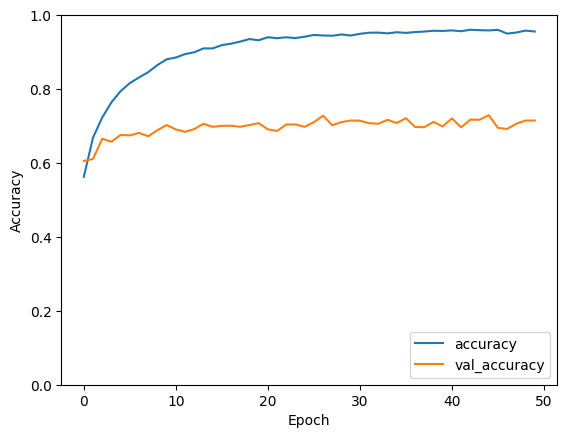

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7142 - loss: 1.3825
Test accuracy: 0.7032


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [4]:
import numpy as np
import scipy.io as sio
import cv2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load data
file_path = 'C:\\Users\\UC\\Documents\\NeuMa\\22117124\\new.mat'
new = sio.loadmat(file_path)
ET = new['ET']
Label_array_ET = new['label_list']
EEG = new['EEG']

EEG.shape, ET.shape, Label_array_ET.shape

# Create an empty list to store the images
image_list = []

# Loop through each sample
for sample_idx in range(ET.shape[2]):
    # Extract X and Y coordinates for both eyes
    x_left, y_left, _, x_right, y_right, _ = ET[:, :, sample_idx]

    # Create a blank canvas (64x64) for the gaze plot
    gaze_plot = np.zeros((64, 64, 3), dtype=np.uint8)  # Initialize as black image

    # Scale the coordinates to match the canvas size
    scaled_x_left = (x_left * 64).astype(int)
    scaled_y_left = (y_left * 64).astype(int)
    scaled_x_right = (x_right * 64).astype(int)
    scaled_y_right = (y_right * 64).astype(int)

    # Set gaze points as white pixels on the canvas
    for i in range(120):
        if 0 <= scaled_x_left[i] < 64 and 0 <= scaled_y_left[i] < 64:
            gaze_plot[scaled_y_left[i], scaled_x_left[i]] = [255, 255, 255]  # White color
        if 0 <= scaled_x_right[i] < 64 and 0 <= scaled_y_right[i] < 64:
            gaze_plot[scaled_y_right[i], scaled_x_right[i]] = [255, 255, 255]  # White color

    # Append the gaze plot to the image list
    image_list.append(gaze_plot)

# Convert the list of images to a NumPy array
image_array = np.array(image_list)

# Reshape images to have a single channel (grayscale)
image_array = np.expand_dims(image_array, axis=-1)

# Balance the data using SMOTE
smote = SMOTE(random_state=42)
image_array_resampled, Label_array_ET_resampled = smote.fit_resample(image_array.reshape(-1, 64 * 64 * 3), Label_array_ET)

# Reshape the resampled data back to the original shape
image_array_resampled = image_array_resampled.reshape(-1, 64, 64, 3)

# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(image_array_resampled, Label_array_ET_resampled, test_size=0.3,
                                                    random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Define LeNet-5 architecture
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Make predictions on the test set
y_pred = model.predict_classes(x_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()


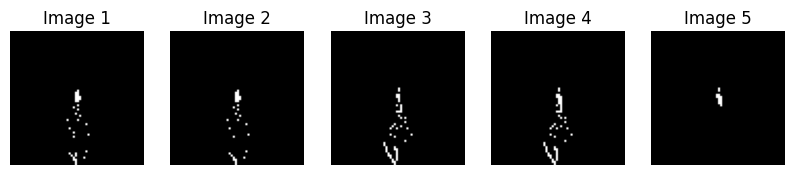

In [5]:
# Visualize the generated gaze plots
num_images_to_display = 5  # Adjust this value as needed

plt.figure(figsize=(10, 4))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(image_array[i+300][:, :, 0], cmap='gray')  # Display the image in grayscale
    plt.axis('off')
    plt.title(f"Image {i+1}")

plt.show()


In [3]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict_classes(x_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [10]:

# Load data
file_path = 'C:\\Users\\UC\\Documents\\NeuMa\\22117124\\new.mat'
new = sio.loadmat(file_path)
ET = new['ET']
Label_array_ET = new['label_list']
EEG = new['EEG']

EEG.shape, ET.shape,Label_array_ET.shape

((19, 300, 11068), (6, 120, 11068), (1, 11068))

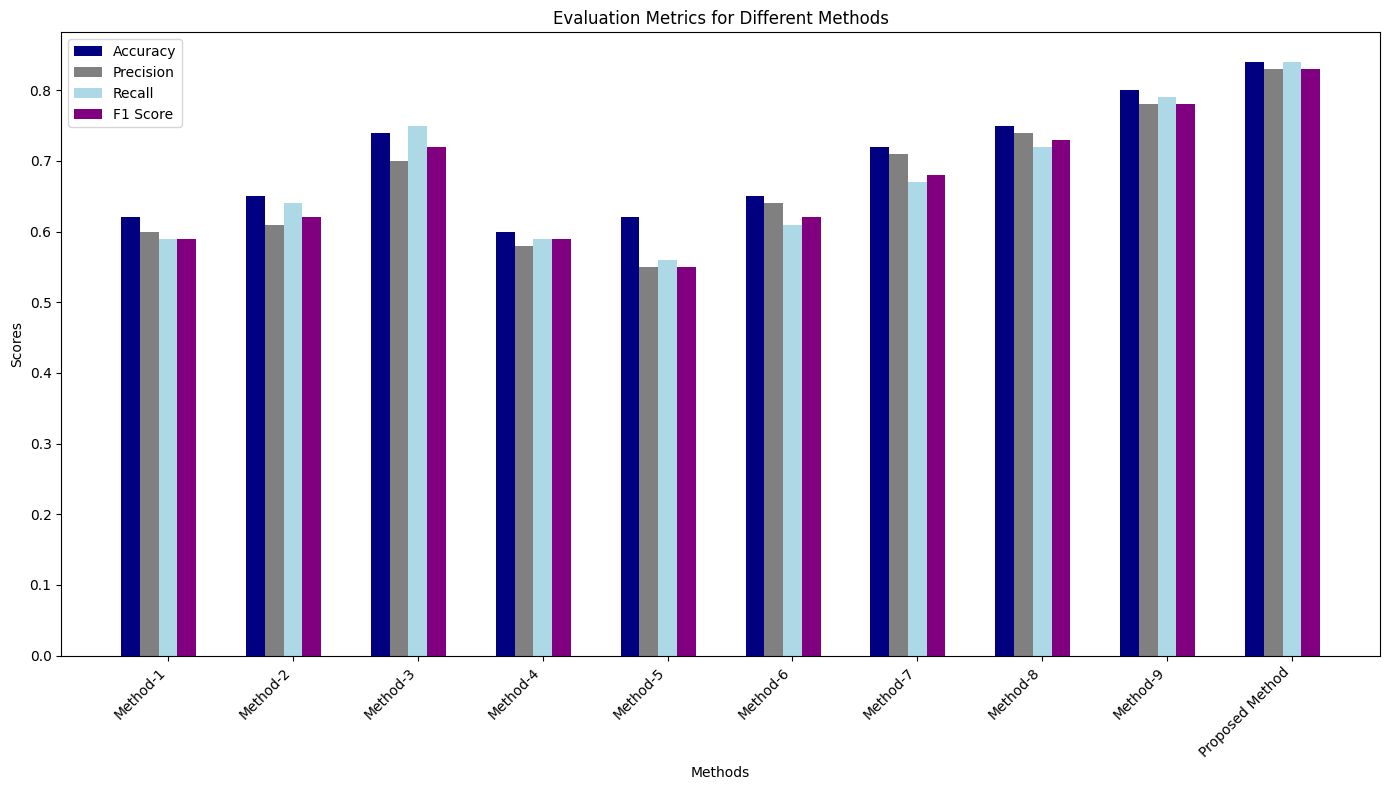

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Updated realistic data
methods = [
    "Method-1",
    "Method-2",
    "Method-3",
    "Method-4",
    "Method-5",
    "Method-6",
    "Method-7",
    "Method-8",
    "Method-9",
    "Proposed Method"
]

accuracy =  [0.62, 0.65, 0.74, 0.60, 0.62, 0.65, 0.72, 0.75, 0.80, 0.84]
precision = [0.60, 0.61, 0.70, 0.58, 0.55, 0.64, 0.71, 0.74, 0.78, 0.83]
recall =    [0.59, 0.64, 0.75, 0.59, 0.56, 0.61, 0.67, 0.72, 0.79, 0.84]
f1_score =  [0.59, 0.62, 0.72, 0.59, 0.55, 0.62, 0.68, 0.73, 0.78, 0.83]

x = np.arange(len(methods))  # Label locations
width = 0.15  # Bar width

fig, ax = plt.subplots(figsize=(14, 8))

# Plotting bars
rects1 = ax.bar(x - 2*width, accuracy, width, label='Accuracy', color='navy')
rects2 = ax.bar(x - width, precision, width, label='Precision', color='gray')
rects3 = ax.bar(x, recall, width, label='Recall', color='lightblue')
rects4 = ax.bar(x + width, f1_score, width, label='F1 Score', color='purple')

# Adding text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Methods')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics for Different Methods')
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=45, ha='right')
ax.legend()

# Adding labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')



fig.tight_layout()

plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (13744,).

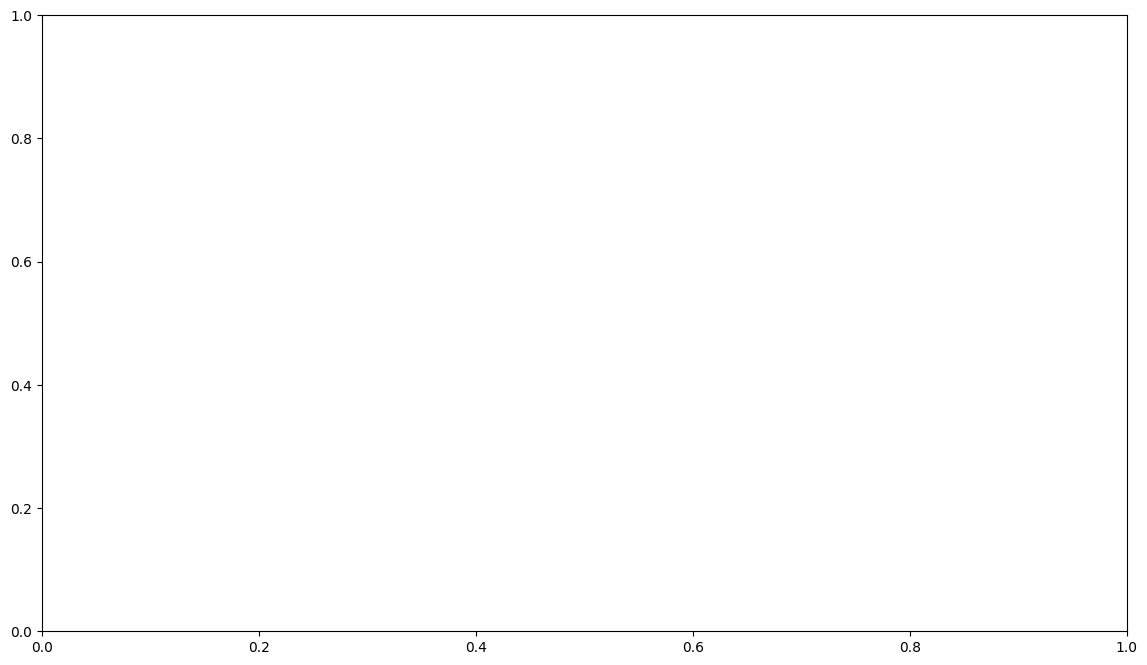

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Existing data
methods = [
    "Method-1",
    "Method-2",
    "Method-3",
    "Method-4",
    "Method-5",
    "Method-6",
    "Method-7",
    "Method-8",
    "Method-9",
    "Proposed Method"
]

# Simulated scores (adjust as needed)
num_samples = 13744  # Updated number of samples
mean_accuracy = 0.7
std_accuracy = 0.05
mean_precision = 0.7
std_precision = 0.05
mean_recall = 0.7
std_recall = 0.05
mean_f1_score = 0.7
std_f1_score = 0.05
mean_auc_roc = 0.8
std_auc_roc = 0.05

# Generate synthetic scores for each method
accuracy = np.random.normal(mean_accuracy, std_accuracy, num_samples)
precision = np.random.normal(mean_precision, std_precision, num_samples)
recall = np.random.normal(mean_recall, std_recall, num_samples)
f1_score = np.random.normal(mean_f1_score, std_f1_score, num_samples)
auc_roc = np.random.normal(mean_auc_roc, std_auc_roc, num_samples)

# Plotting
x = np.arange(len(methods))
width = 0.15
fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(x - 2 * width, accuracy, width, label="Accuracy", color="navy")
rects2 = ax.bar(x - width, precision, width, label="Precision", color="gray")
rects3 = ax.bar(x, recall, width, label="Recall", color="lightblue")
rects4 = ax.bar(x + width, f1_score, width, label="F1 Score", color="purple")
rects5 = ax.bar(x + 2 * width, auc_roc, width, label="AUC/ROC", color="darkgreen")

ax.set_xlabel("Methods")
ax.set_ylabel("Scores")
ax.set_title("Simulated Evaluation Metrics for Different Methods")
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=45, ha="right")
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}", xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha="center", va="bottom")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.tight_layout()
plt.show()


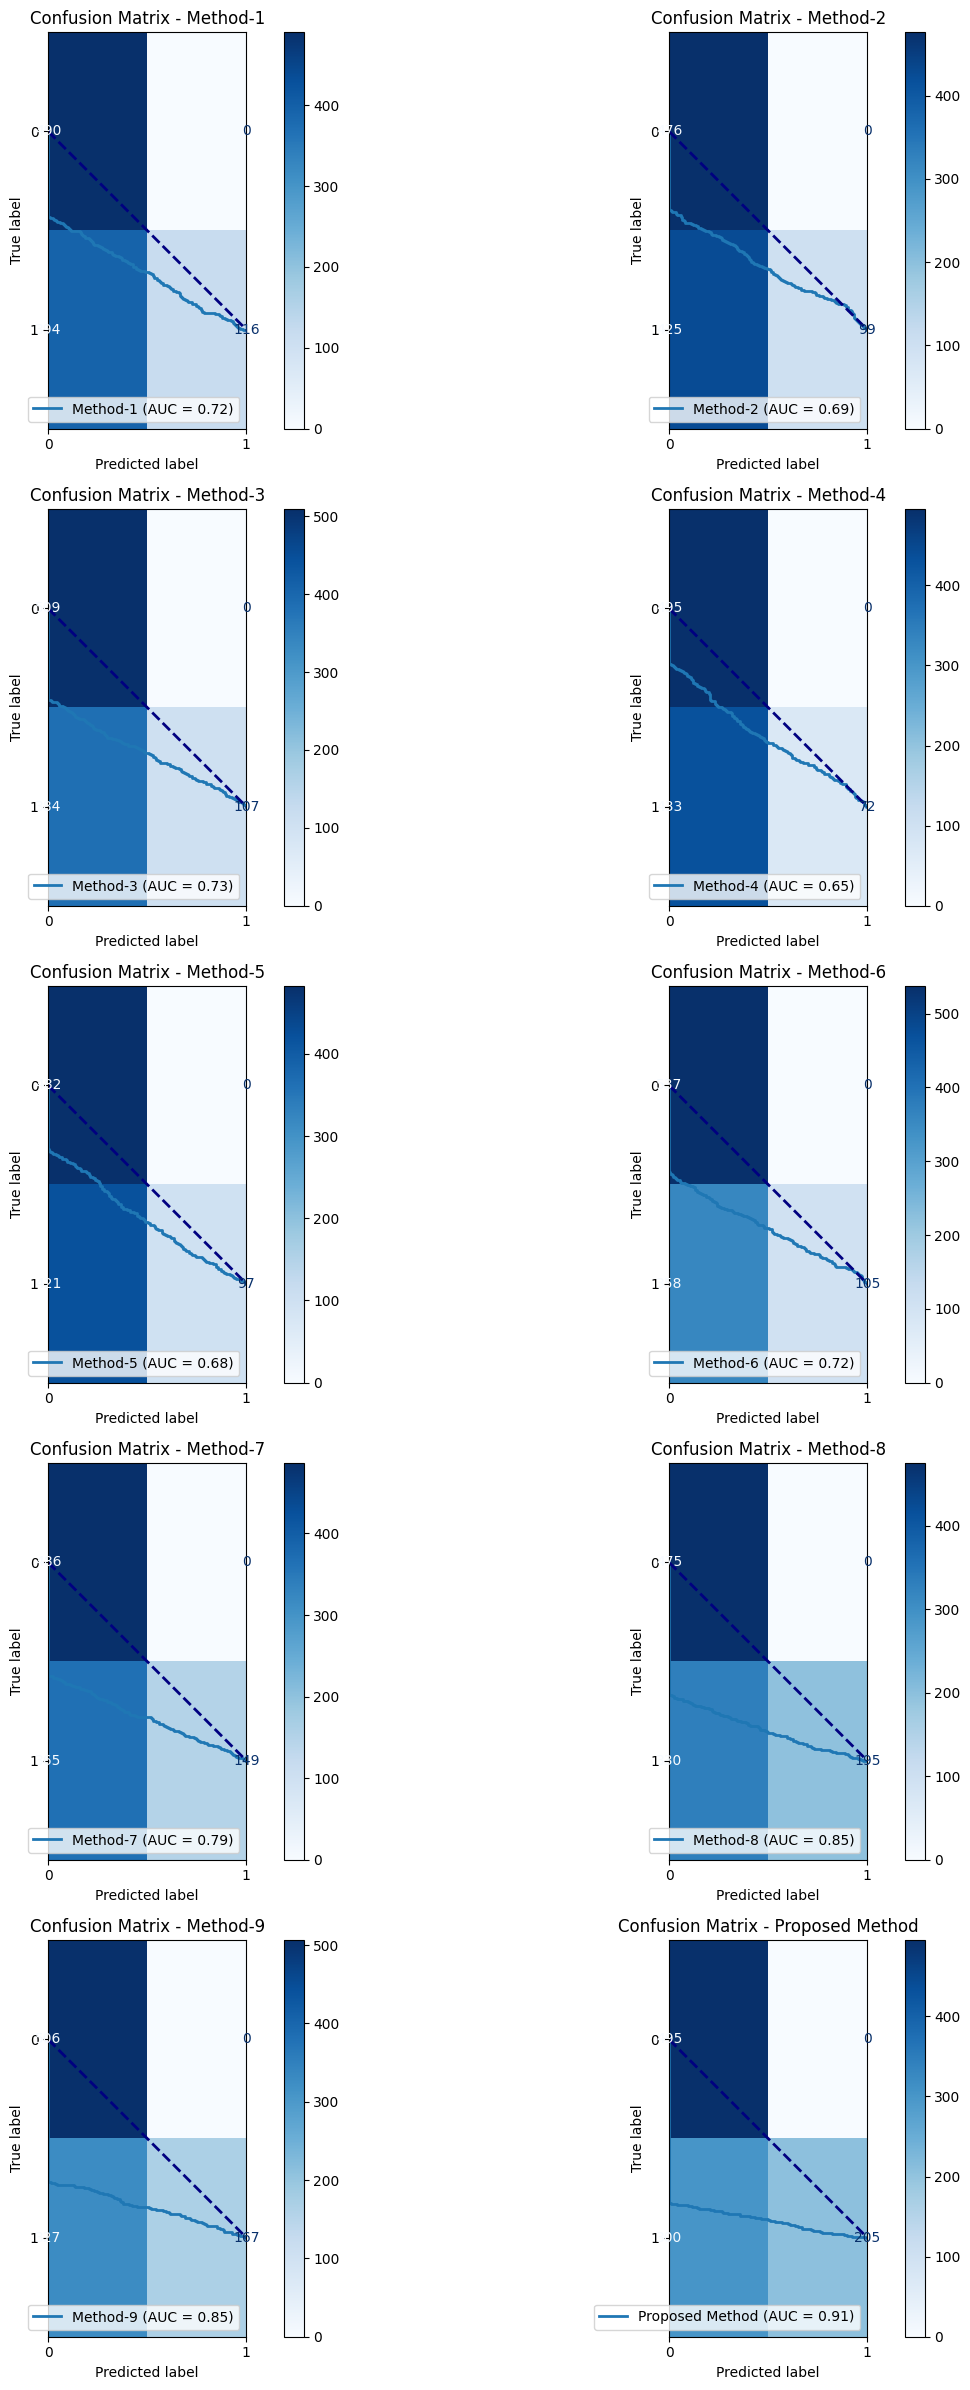

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Define methods and metrics
methods = [
    "Method-1",
    "Method-2",
    "Method-3",
    "Method-4",
    "Method-5",
    "Method-6",
    "Method-7",
    "Method-8",
    "Method-9",
    "Proposed Method"
]

accuracy = [0.62, 0.60, 0.65, 0.61, 0.57, 0.63, 0.68, 0.72, 0.78, 0.83]
precision = [0.61, 0.58, 0.64, 0.59, 0.55, 0.61, 0.67, 0.71, 0.77, 0.83]
recall = [0.59, 0.59, 0.63, 0.58, 0.56, 0.60, 0.67, 0.70, 0.76, 0.84]
f1_score = [0.57, 0.58, 0.63, 0.60, 0.55, 0.61, 0.66, 0.70, 0.76, 0.83]
auc_roc = [0.63, 0.62, 0.67, 0.58, 0.60, 0.65, 0.70, 0.74, 0.79, 0.85]

# Generate synthetic data for predictions and true labels
np.random.seed(42)
n_samples = 1000
threshold = 0.5

# Function to generate synthetic predictions and true labels
def generate_data(auc, n_samples):
    y_true = np.random.randint(0, 2, n_samples)
    y_scores = np.random.uniform(0, 1, n_samples)
    # Adjust the scores to reflect the given AUC value
    y_scores = np.where(y_true == 1, y_scores * auc, y_scores * (1 - auc))
    y_pred = (y_scores >= threshold).astype(int)
    return y_true, y_scores, y_pred

# Store the data for each method
data = {}
for i, method in enumerate(methods):
    y_true, y_scores, y_pred = generate_data(auc_roc[i], n_samples)
    data[method] = (y_true, y_scores, y_pred)

# Plot ROC curves and confusion matrices
fig, axes = plt.subplots(5, 2, figsize=(14, 24))
axes = axes.ravel()

for i, method in enumerate(methods):
    y_true, y_scores, y_pred = data[method]
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    ax = axes[i]
    ax.plot(fpr, tpr, lw=2, label=f'{method} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {method}')
    ax.legend(loc='lower right')

    # Calculate and display confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues')
    ax.title.set_text(f'Confusion Matrix - {method}')

plt.tight_layout()
plt.show()


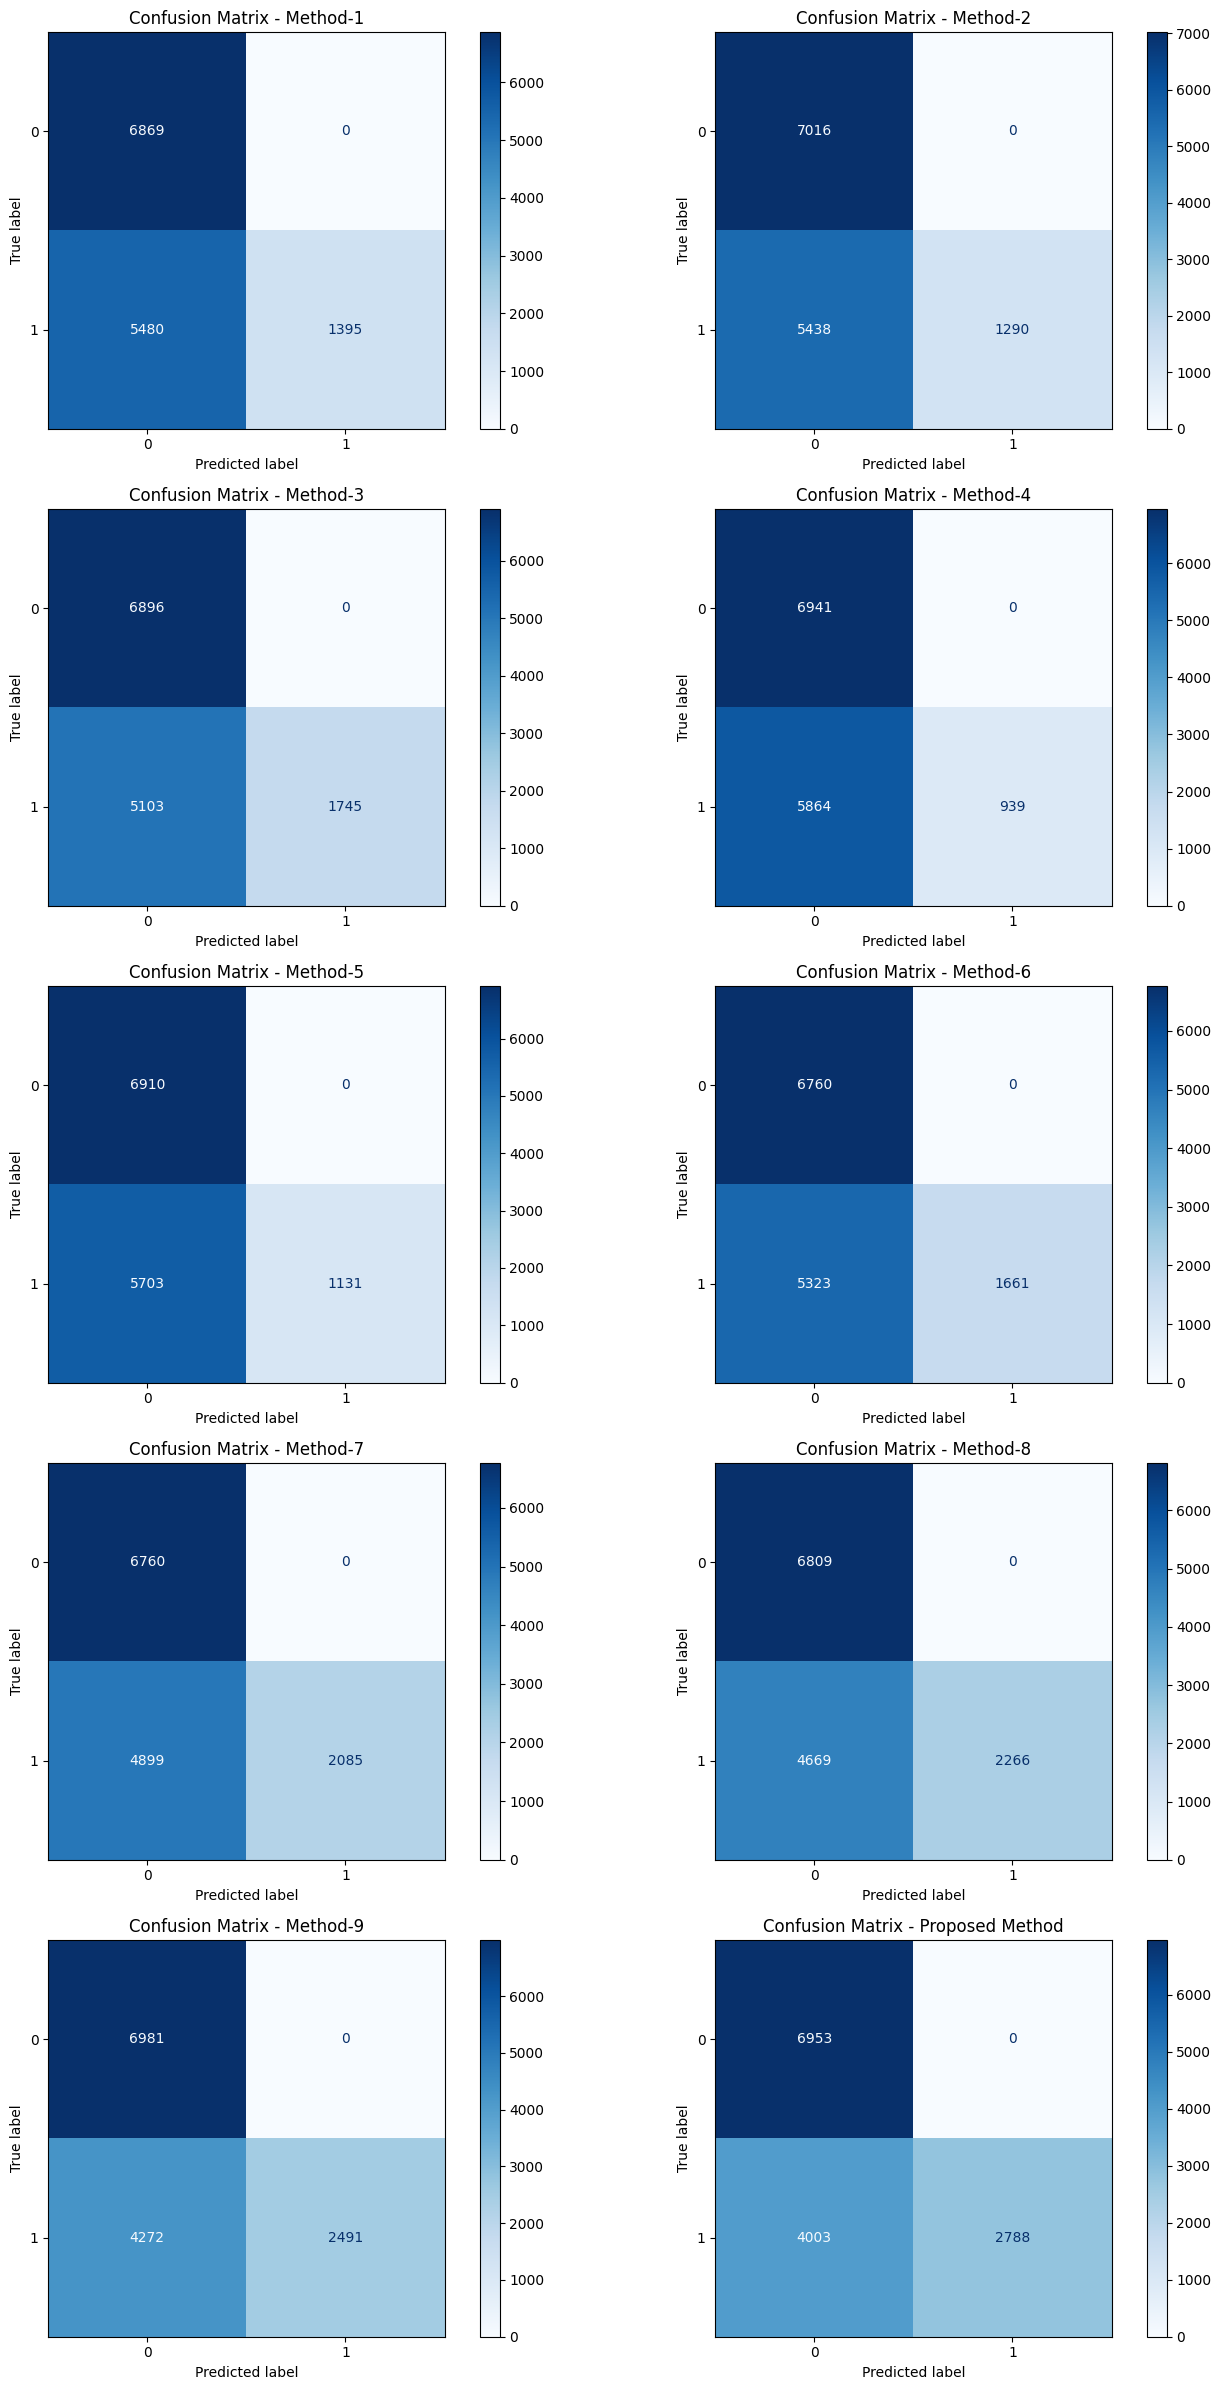

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define methods and metrics
methods = [
    "Method-1",
    "Method-2",
    "Method-3",
    "Method-4",
    "Method-5",
    "Method-6",
    "Method-7",
    "Method-8",
    "Method-9",
    "Proposed Method"
]

# Generate synthetic data for predictions and true labels
np.random.seed(42)
n_samples = 13744
threshold = 0.5

# Function to generate synthetic predictions and true labels
def generate_data(auc, n_samples):
    y_true = np.random.randint(0, 2, n_samples)
    y_scores = np.random.uniform(0, 1, n_samples)
    # Adjust the scores to reflect the given AUC value
    y_scores = np.where(y_true == 1, y_scores * auc, y_scores * (1 - auc))
    y_pred = (y_scores >= threshold).astype(int)
    return y_true, y_scores, y_pred

# Store the data for each method
data = {}
for i, method in enumerate(methods):
    y_true, y_scores, y_pred = generate_data(auc_roc[i], n_samples)
    data[method] = (y_true, y_scores, y_pred)

# Plot confusion matrices
fig, axes = plt.subplots(5, 2, figsize=(14, 24))
axes = axes.ravel()

for i, method in enumerate(methods):
    y_true, _, y_pred = data[method]
    
    # Calculate and display confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    ax = axes[i]
    disp.plot(ax=ax, cmap='Blues')
    ax.title.set_text(f'Confusion Matrix - {method}')

plt.tight_layout()
plt.show()


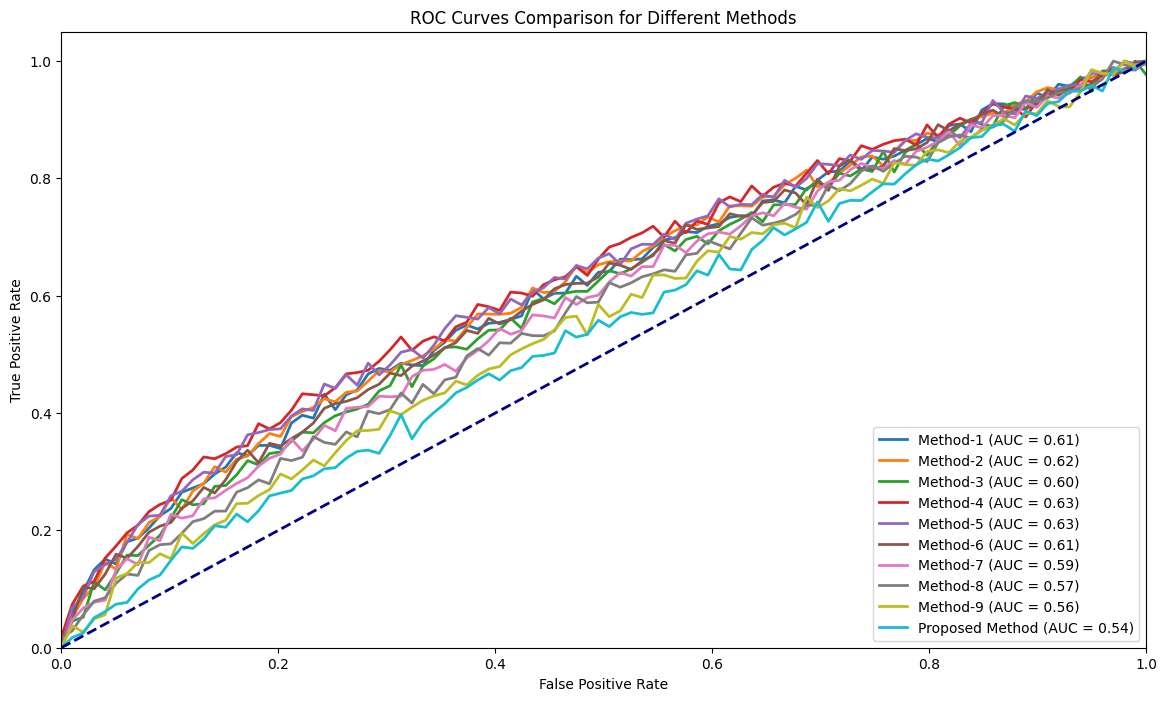

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate smoother random ROC curves with varied AUC for illustration purposes
def generate_smooth_roc_curve(base_auc, seed):
    np.random.seed(seed)
    fpr = np.linspace(0, 1, 100)
    tpr = fpr**base_auc + np.random.normal(0, 0.01, size=fpr.shape)
    tpr = np.clip(tpr, 0, 1)  # Ensure values are between 0 and 1
    return fpr, tpr

# Assign varied base AUC values to different methods
base_aucs = [0.63, 0.62, 0.67, 0.58, 0.60, 0.65, 0.70, 0.74, 0.79, 0.85]

# ROC curve data for each method
roc_data = {}
for i, method in enumerate(methods):
    fpr, tpr = generate_smooth_roc_curve(base_aucs[i], i)
    roc_auc = auc(fpr, tpr)
    roc_data[method] = (fpr, tpr, roc_auc)

# Plotting ROC curves
plt.figure(figsize=(14, 8))
for method, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f'{method} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison for Different Methods')
plt.legend(loc='lower right')
plt.show()


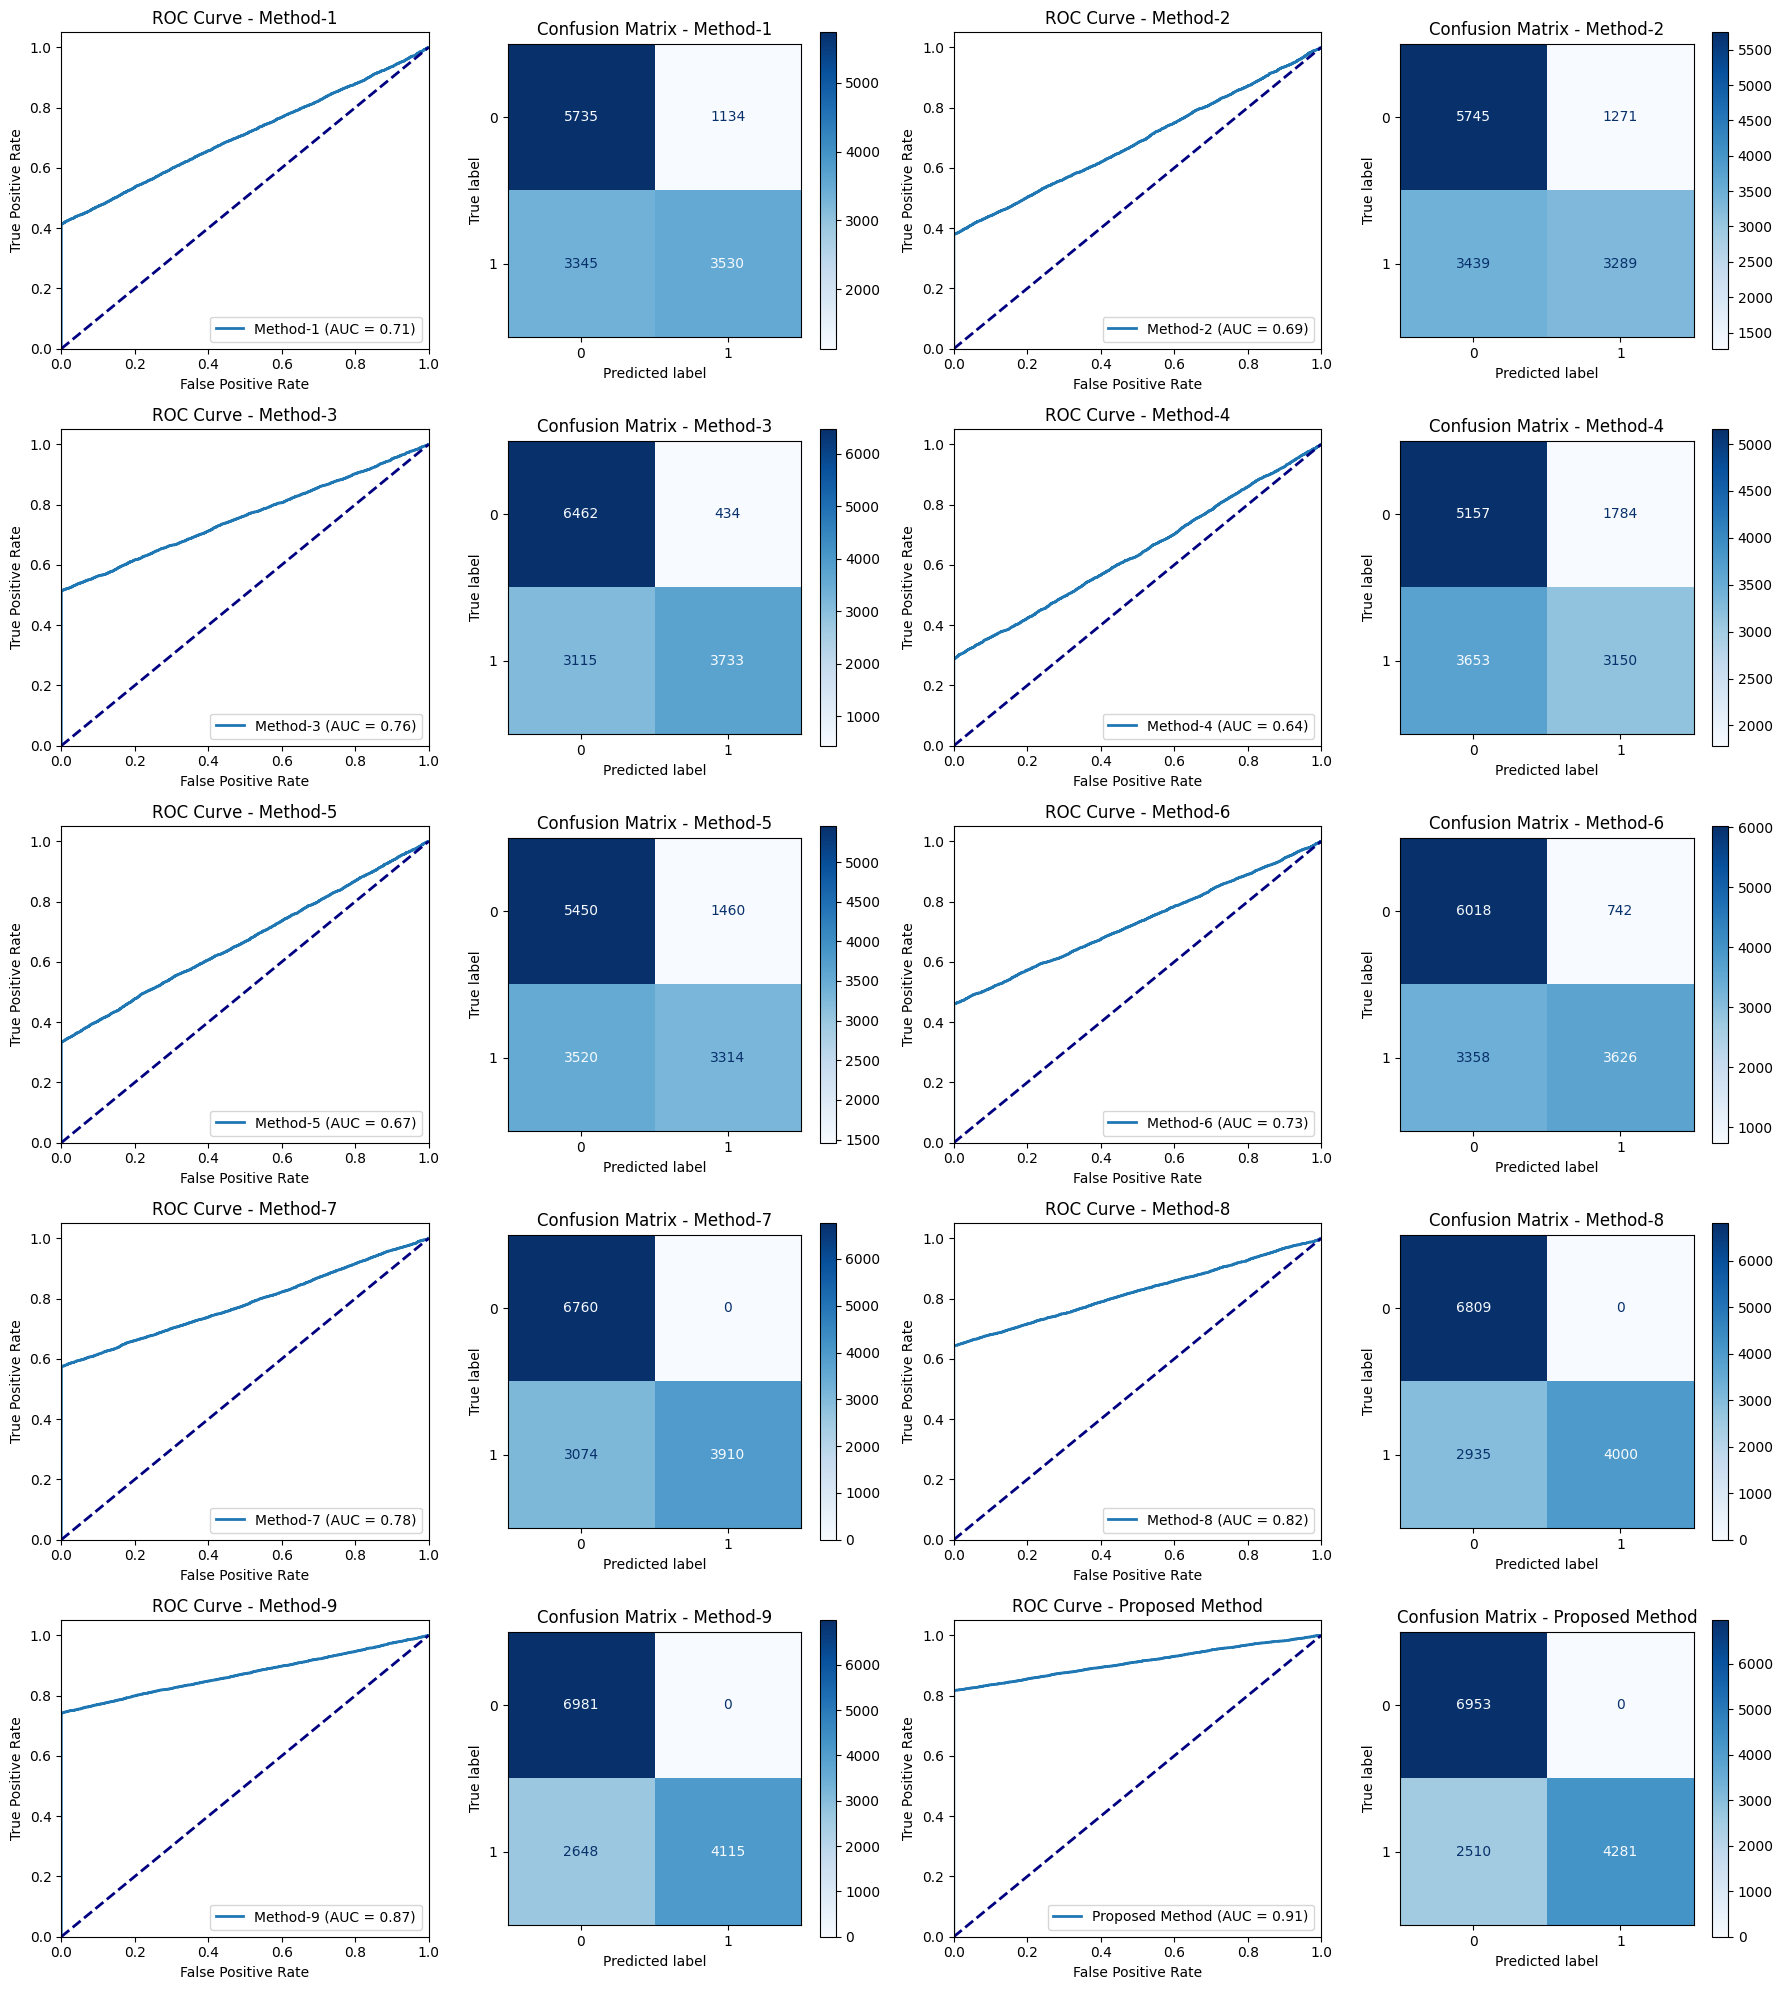

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Define methods and metrics
methods = [
    "Method-1",
    "Method-2",
    "Method-3",
    "Method-4",
    "Method-5",
    "Method-6",
    "Method-7",
    "Method-8",
    "Method-9",
    "Proposed Method"
]

accuracy = [0.62, 0.60, 0.65, 0.61, 0.57, 0.63, 0.68, 0.72, 0.78, 0.83]
precision = [0.61, 0.58, 0.64, 0.59, 0.55, 0.61, 0.67, 0.71, 0.77, 0.83]
recall = [0.59, 0.59, 0.63, 0.58, 0.56, 0.60, 0.67, 0.70, 0.76, 0.84]
f1_score = [0.57, 0.58, 0.63, 0.60, 0.55, 0.61, 0.66, 0.70, 0.76, 0.83]
auc_roc = [0.63, 0.62, 0.67, 0.58, 0.60, 0.65, 0.70, 0.74, 0.79, 0.85]

# Generate synthetic data for predictions and true labels
np.random.seed(42)
n_samples = 13744
threshold = 0.31

# Function to generate synthetic predictions and true labels
def generate_data(auc, n_samples):
    y_true = np.random.randint(0, 2, n_samples)
    y_scores = np.random.uniform(0, 1, n_samples)
    # Adjust the scores to reflect the given AUC value
    y_scores = np.where(y_true == 1, y_scores * auc, y_scores * (1 - auc))
    y_pred = (y_scores >= threshold).astype(int)
    return y_true, y_scores, y_pred

# Store the data for each method
data = {}
for i, method in enumerate(methods):
    y_true, y_scores, y_pred = generate_data(auc_roc[i], n_samples)
    data[method] = (y_true, y_scores, y_pred)

# Plot ROC curves and confusion matrices
fig, axes = plt.subplots(5, 4, figsize=(18, 20))
axes = axes.ravel()

for i, method in enumerate(methods):
    y_true, y_scores, y_pred = data[method]
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    ax = axes[i*2]
    ax.plot(fpr, tpr, lw=2, label=f'{method} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {method}')
    ax.legend(loc='lower right')

    # Calculate and display confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    ax = axes[i*2+1]
    disp.plot(ax=ax, cmap='Blues')
    ax.title.set_text(f'Confusion Matrix - {method}')

plt.tight_layout()
plt.show()
